In [4]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-11-14 20:20:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   198MB/s    in 0.3s    

2022-11-14 20:20:45 (198 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Primeiro passo:Carregar os datasets de caos e gatos.

## Apos, desbloquear o acesso a pasta pelo comando !unzip

 ## Instalar o tensorFlow

In [5]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [6]:
!rm -rf cats_and_dogs_filtered.zip

In [7]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os 
import matplotlib.pyplot as plt
import tensorflow as tf


## Declarar as variáveis no formato das imagens que estão no diretório de trainer e no diretório de validation.

1.   List item
2.   List item



In [8]:
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))


print('Train Cats %s' % dataset_train_cats_len)
print('Train Cats %s' % dataset_train_dogs_len)
print('Validation Cats %s' % dataset_validation_cats_len)
print('Validation Dogs %s' % dataset_validation_dogs_len)

Train Cats 1000
Train Cats 1000
Validation Cats 1000
Validation Dogs 1000


Precisa-se pré processar as imagens, pois não consegue-se trabalhar com binários de imagens. 

Portanto, precisa-se definir configurações de entrada.

Primerio, define-se o tamanho da imagem (converter toda as imagens para o temanho de 160 x 160 mm)

Vamos diminuir a imagem para identificar os pontos que serão reconhecidos.

Serão criados as variáveis para armazenar essas configurações
 - largura
 - altura
 - cor da imagen
 - tamanho 
 - formato 

In [9]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)



Declarar tambem variaveis que seráo utilizadas no treinamento. 

bach_size - quantidades de featuring que sera trazida no dataset, com um valor default

epochs - numero de vezes que sera realizado o 'scanner' no dataset

learning_rate e a taxa de  aprendizado da maquina

class_name - ao inves de sair o valor 0 ou 1, saira o nome cat ou dog 



In [42]:
batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['cat', 'dog']

Sera criado o dataset conforme a configuracao anterior definidas. 
chamando a biblioteca keras. 

In [11]:
dataset_tain = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


Percebe-se acima que tem-se duas classes (cats and dogs) e 2000 arquivos (100 para cada classe)

Cria-se o dataset de validacao 


In [12]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir, 
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


Construir um dataset com uma part do dataset de validacao cardinality - para retornar o tamanho do dataset



In [13]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 26
Test Dataset Cardinality: 6


Agora, definir uma funcao para plotar as imagens 

In [14]:
def plot_dataset(dataset):

  plt.gcf().clear()
  plt.figure(figsize= (15,15))

  for features, labels in dataset.take(1):
      for i in range (9):
          plt.subplot (3,3, i+1)
          plt.axis('off')

          plt.imshow(features[i].numpy().astype('uint8'))
          plt.title(class_names[labels[i]])


Chamar a função para identificar se as labels estáo iguais a features de entradas

In [ ]:
plot_dataset(dataset_tain)

In [ ]:
plot_dataset(dataset_test)

Para realizar pequenas alterações nas featuring

> Indented block



In [26]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2) 
])

criar a função para plotar as figuras nessa camada 


In [27]:
 def plot_dataset_data_augmentation(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, _ in dataset.take(1):

        feature = features[0]

        for i in range(9):

            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(feature_data_augmentation[0] / image_color_channel_size)

Criando o modelo


```
tf.keras.experimental.preprocessing.Rescaling(
            1. / image_color_channel_size,
            input_shape = image_shape ),
padronizar o tamanho das labels
```



<Figure size 432x288 with 0 Axes>

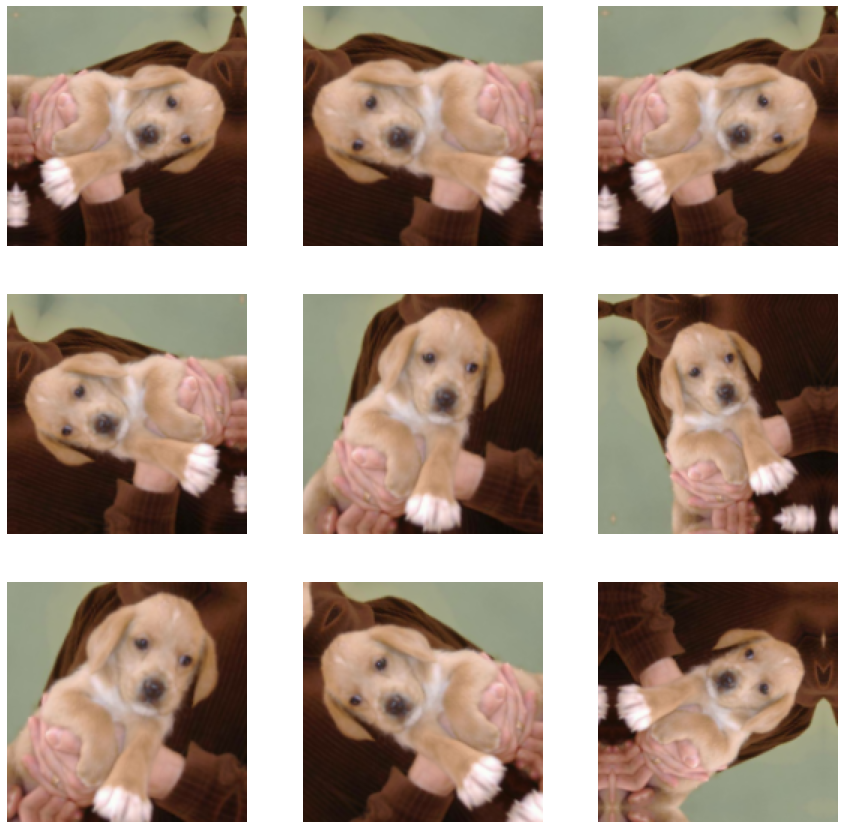

In [30]:
plot_dataset_data_augmentation(dataset_tain)

Tecnica Tranfer_Learning

Para obter mais precisão no modelo 

In [43]:
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')
model_transfer_learning.trainable = False

model_transfer_learning.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
            1. / (image_color_channel_size/2),
            offset = -1,
            input_shape = image_shape),
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
  ])

model.compile (
    optimizer =tf.keras.optimizers.Adam(learning_rate =learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 256)               327936    
                                                                 
 dropout_3 (Dropout)         (None, 256)              

Treinar o modelo


In [47]:
history = model.fit(
    dataset_tain,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/20
63/63 [==============================] - 65s 969ms/step - loss: 0.3935 - accuracy: 0.8095 - val_loss: 0.1322 - val_accuracy: 0.9616
Epoch 2/20
63/63 [==============================] - 62s 975ms/step - loss: 0.1959 - accuracy: 0.9175 - val_loss: 0.0877 - val_accuracy: 0.9765
Epoch 3/20
63/63 [==============================] - 62s 976ms/step - loss: 0.1585 - accuracy: 0.9315 - val_loss: 0.0739 - val_accuracy: 0.9777
Epoch 4/20
63/63 [==============================] - 60s 959ms/step - loss: 0.1424 - accuracy: 0.9405 - val_loss: 0.0681 - val_accuracy: 0.9814
Epoch 5/20
63/63 [==============================] - 61s 975ms/step - loss: 0.1245 - accuracy: 0.9500 - val_loss: 0.0583 - val_accuracy: 0.9802
Epoch 6/20
63/63 [==============================] - 62s 975ms/step - loss: 0.1274 - accuracy: 0.9500 - val_loss: 0.0505 - val_accuracy: 0.9827
Epoch 7/20
63/63 [==============================] - 62s 987ms/step - loss: 0.1322 - accuracy: 0.9460 - val_loss: 0.0603 - val_accuracy: 0.9814

In [22]:
def plot_model():
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.gcf().clear
  plt.figure(figsize=(15,8))

  plt.subplot(1,2,1)
  plt.title ('Training Validation Accuracy')
  plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
  plt.legend(loc = 'lover right')

  plt.subplot(1,2,2)
  plt.title('Training and Validation loss')
  plt.plot(epochs_range, loss, label = 'Training Loss')
  plt.plot(epochs_range, val_loss, label= 'Validation Loss')
  plt.legend(loc = 'lower right')

  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'lover right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

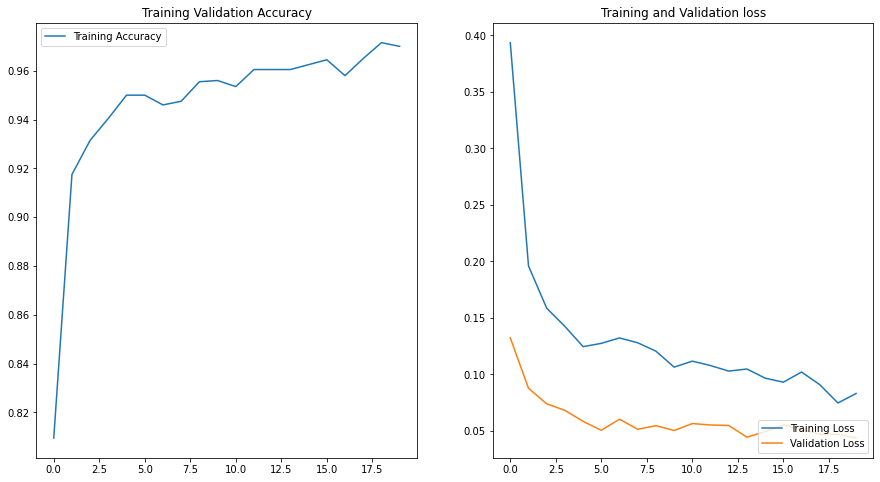

In [48]:
plot_model()

Percebe-se que ha um overfetting, a rede neural treinou bem, porem nao reconhce outro datasets
 Para tentar amenizar, aumenta-se a quantidade de parametos das camdas e denser layers 

Criar uma função para saber se a rede que foi treinada acertará no dataset 

In [49]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1]
Predictions: [1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1]


<Figure size 432x288 with 0 Axes>

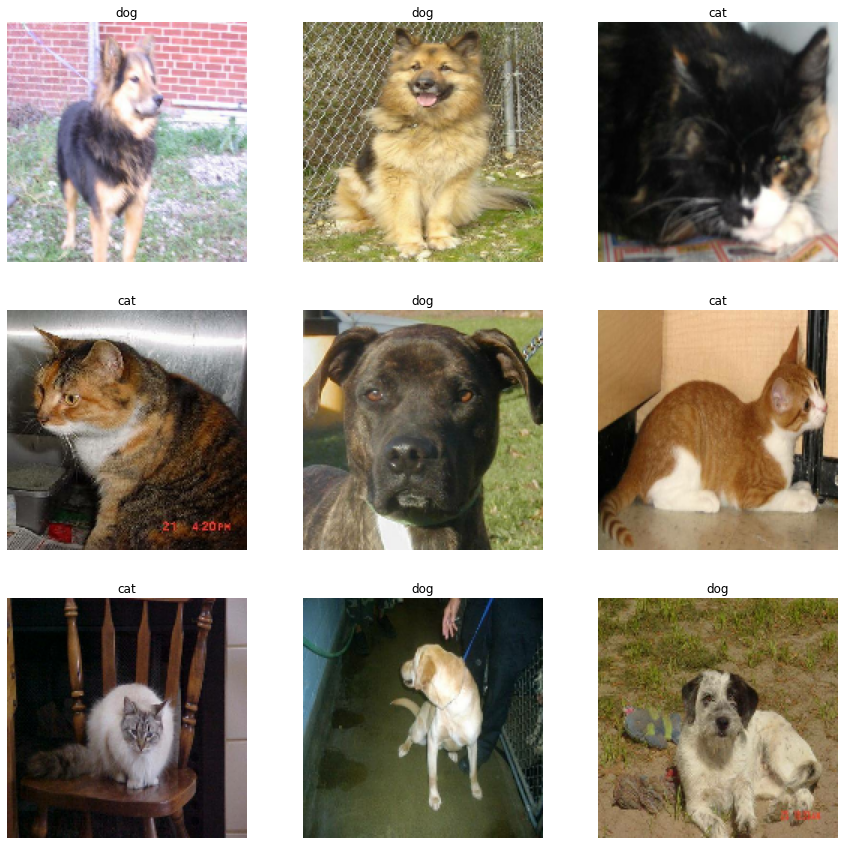

In [50]:
plot_dataset_predictions(dataset_test)

Percebe-se que o modelo foi melhorado a partir da técnica de Transfer Learning. assim otimizando o output. 

Salvar o modelo 

In [20]:
model.save('path/to/model')

In [21]:
model = tf.keras.models.load_model('path/to/model')

Fazendo a análise qualitativa para observar a relação modelo e predição
aplicar as metricas no data set de validação e de treinamento. 
- voltar na linha apos o history para criar essa função 

